<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/mlc_2324_w7_Ass_linear_regr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression

* Machine Learning Concepts (MLC)
* Week 7, 2023/24
* Luciano Gerber

## Preamble: Importing and Configuring Essential Packages


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [18]:
from google.colab import files
uploaded = files.upload()


Saving adverts.csv to adverts.csv


In [19]:
import io
data1 = pd.read_csv(io.BytesIO(uploaded['adverts.csv']))



In [20]:
data1.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


### Example Dataset: Advertising and Sales

In [ ]:
adv = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0015-2324/main/datasets/Advertising.csv',
    index_col=0
)

In [ ]:
adv.head(3)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


## EDA: Feature/Target Relationships

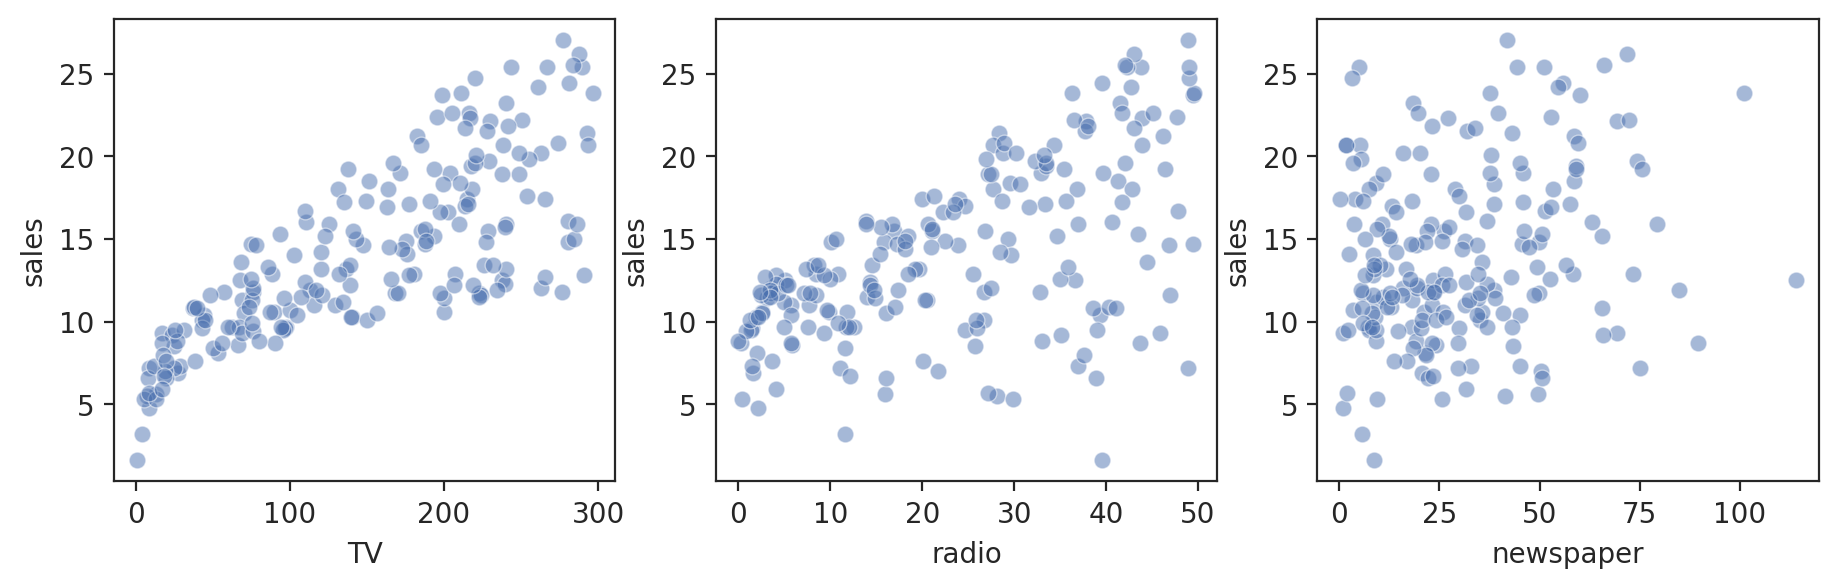

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(11,3))
sns.scatterplot(data=adv, x='TV', y='sales', alpha=0.5, ax=axs[0])
sns.scatterplot(data=adv, x='radio', y='sales', alpha=0.5, ax=axs[1])
sns.scatterplot(data=adv, x='newspaper', y='sales', alpha=0.5, ax=axs[2]);

## The X/y Split

In [ ]:
X = adv.drop(columns='sales')
y = adv['sales']

## The Train/Test Split


In [ ]:
# Obs.: normally, this is done before any data transformations to avoid "leakage".
# We'll come back to this when we discuss pipelines later in the term
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((150, 3), (50, 3))

## A 1D Linear Model

In the real world, very rarely one would rely on a single feature for predictive modelling. For illustration purposes, it is useful, though, to start with the simplest case.

In [ ]:
X_tv = X[['TV']]

In [ ]:
X_tv_train, X_tv_test = X_train[['TV']], X_test[['TV']]

In [ ]:
lr1d = LinearRegression()

In [ ]:
lr1d.fit(X_tv_train, y_train)

LinearRegression()

In [ ]:
a_linear_test_set = pd.DataFrame(
    np.linspace(X[['TV']].min(), X[['TV']].max(), 500), columns=X_tv_train.columns
)

In [ ]:
y_pred = lr1d.predict(a_linear_test_set)

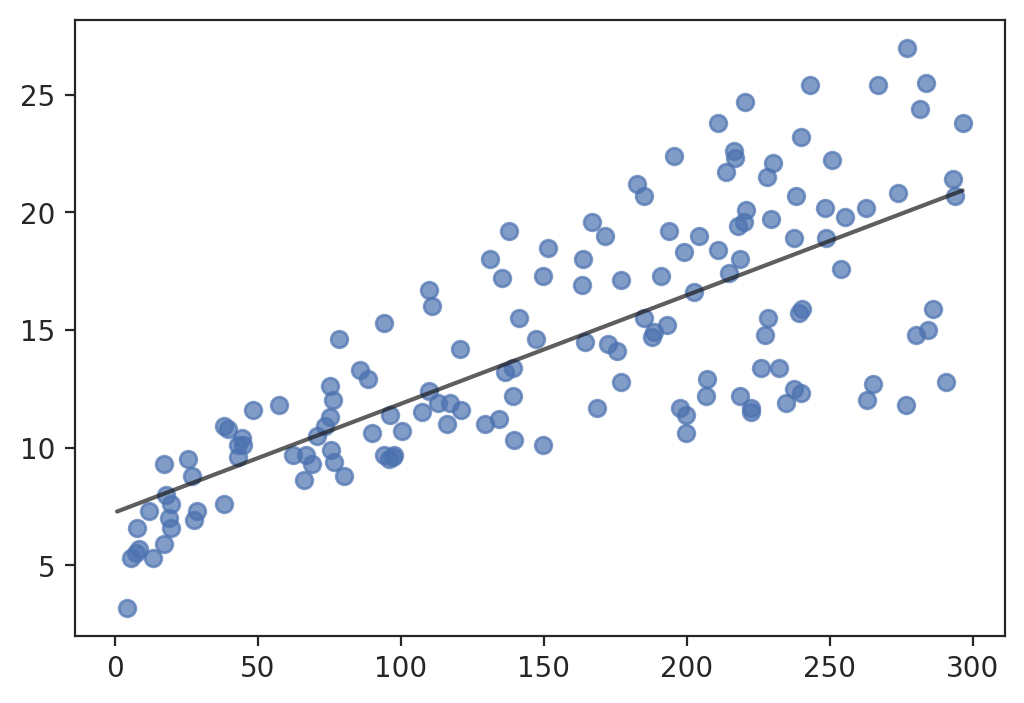

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(X_tv_train['TV'], y_train, alpha=0.7)
ax.plot(a_linear_test_set, y_pred, '-k', alpha=0.7);

In [ ]:
lr1d.coef_

array([0.04614341])

In [ ]:
lr1d.intercept_

7.248909283005854

In [ ]:
mean_absolute_error(y_train, lr1d.predict(X_train[['TV']]))

2.6490233066010336

In [ ]:
mean_absolute_error(y_test, lr1d.predict(X_test[['TV']]))

2.298513328039085

## A Multivariate Linear Regression Model

We don't have the luxury of plotting lines or surfaces anymore, but it is the same principle - intercept and slopes (coefficients) associated with each feature.

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

### Aggregate Score/Loss

In [ ]:
# score: the higher, the better; loss: the lower, the better

In [ ]:
# R2 by default amount of variance of the target explained by the model
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9072183330817297, 0.8576396745320893)

In [ ]:
# interpretation of the loss: the average residual value (here, sales in US$1000s)
mean_absolute_error(y_train, lr.predict(X_train))

1.2248611099616424

In [ ]:
mean_absolute_error(y_test, lr.predict(X_test))

1.3000320919235449

In [ ]:
lr.coef_

array([0.04416235, 0.19900368, 0.00116268])

### Residuals

In [ ]:
y_test.iloc[0]

11.3

In [ ]:
# the test data for predict has to be 2D (even if we are providing a single observation)
lr.predict(X_test.iloc[[0]])

array([10.0494569])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_test.head().to_numpy()

array([11.3,  8.4,  8.7, 25.4, 11.7])

In [ ]:
y_pred[:5]

array([10.0494569 ,  7.43052335,  6.97152143, 24.16378667, 12.00215643])

In [ ]:
(y_pred - y_test).head()

19    -1.250543
171   -0.969477
108   -1.728479
99    -1.236213
178    0.302156
Name: sales, dtype: float64

In [ ]:
# mean absolute error: take the average of the absolute values of the residuals
# (only the magnitude matters)
# sklearn has an implementation of this as mean_absolute_error; I am only
# reimplementing it here for teaching purposes
np.mean(np.abs(y_pred - y_test))

1.3000320919235449

### Actual vs Predicted

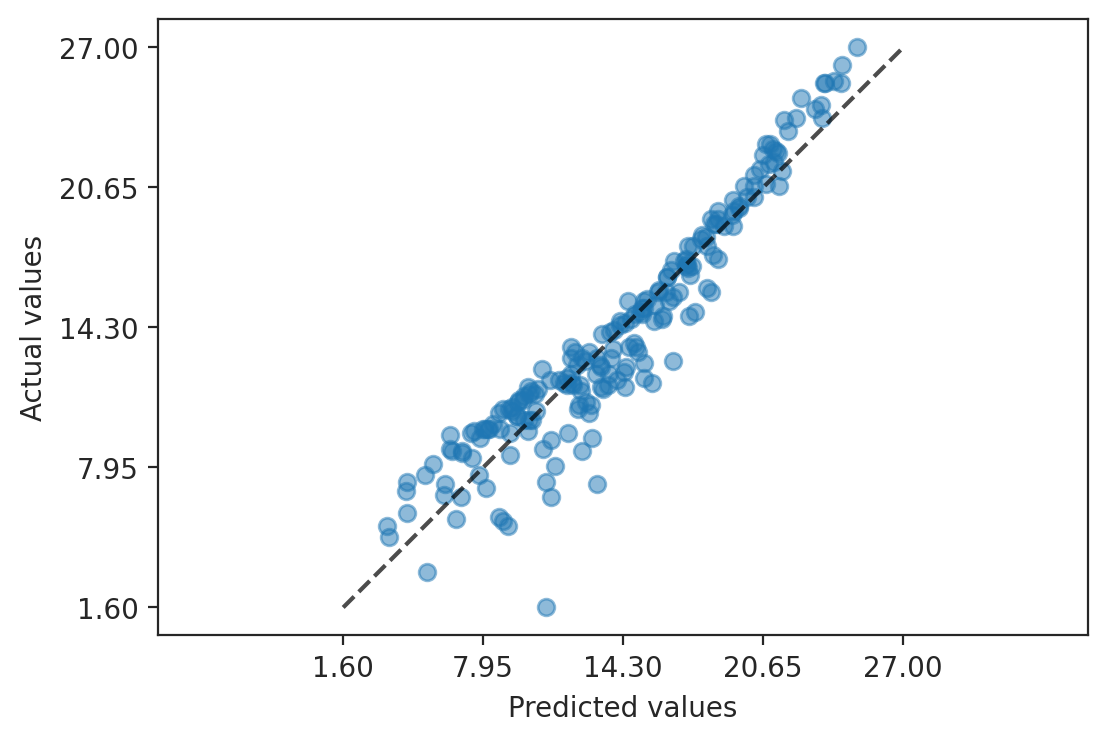

In [ ]:
PredictionErrorDisplay.from_estimator(
    lr, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

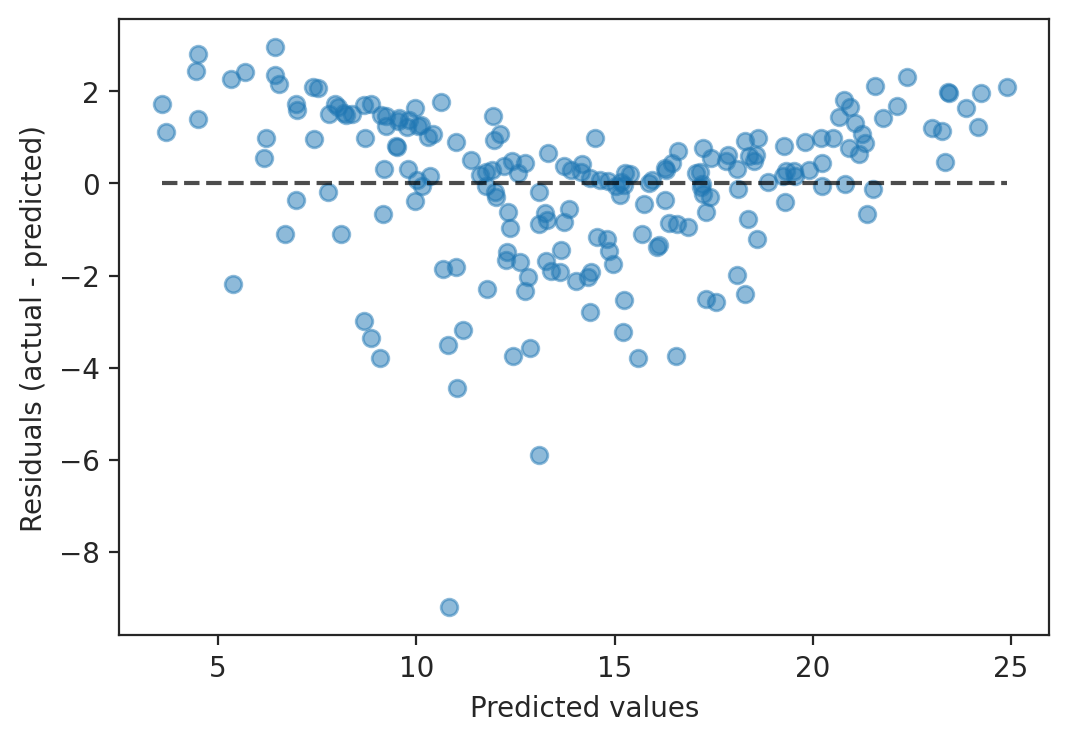

In [ ]:
PredictionErrorDisplay.from_estimator(
    lr, X, y, kind="residual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
residuals = lr.predict(X) - y

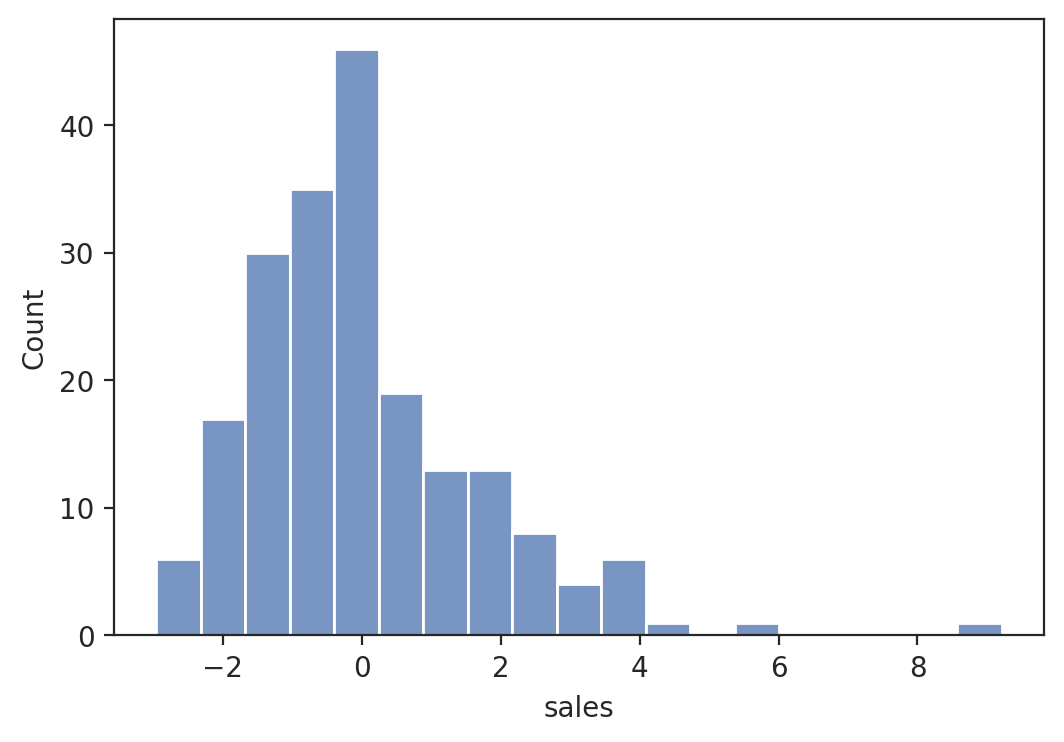

In [ ]:
sns.histplot(residuals);

### Cross Validated Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error')
scores.mean()*-1, scores.std()

(1.305033398099777, 0.21829569846834307)